# INTERN AT SPARKS FOUNDATION(MARCH 2023)


# DOMAIN DATA SCIENCE AND BUSINESS ANALYTICS

# TASK 2:PREDICTION USING UNSUPERVISED ML

# AUTHOR:DUDDU VENKATESH

PROBLEM:Predict the optimal no of clusters from given dataset(iris) and it represent visually

Dataset link:"https://bit.ly/3kXTdox"

In [29]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#loading the dataset
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
#count the no of rows and columns in the given dataset
df.shape

(150, 6)

In [32]:
#checking the missing values in the data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [34]:
df.drop(['Id','SepalLengthCm','SepalWidthCm','Species'],axis='columns',inplace=True)

In [35]:
df.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Working of the K-means Algorithm
step-1:Choose the number of clusters, k, you want to divide your data into.
    
step-2:Initialize k cluster centroids randomly. Each centroid represents the center point of a cluster.
    
step-3:Assign each data point to the closest cluster centroid. This is done by calculating the distance between each data point 
        and each centroid, and assigning the point to the cluster with the closest centroid.
        
step-4:Calculate the mean of all the data points in each cluster, and move the corresponding centroid to this mean.
    
step-5:Repeat steps 3 and 4 until the clusters converge, meaning that the cluster assignments of each data point don't change          anymore, or a maximum number of iterations is reached.

In [39]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y=km.fit_predict(df)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
df['cluster']=y
df.head(5)

,PetalLengthCm,PetalWidthCm,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [41]:
df.cluster.unique()

array([1, 0, 2])

In [46]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

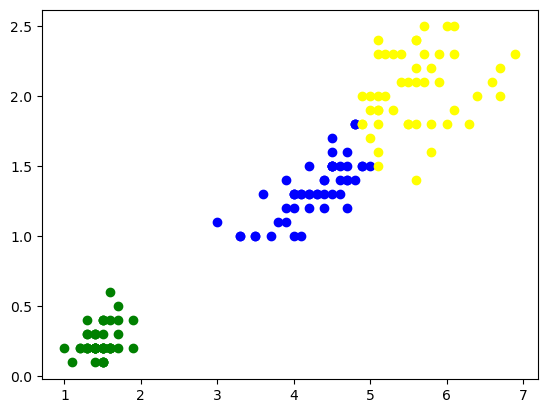

In [47]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='yellow')

C:\Users\manid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


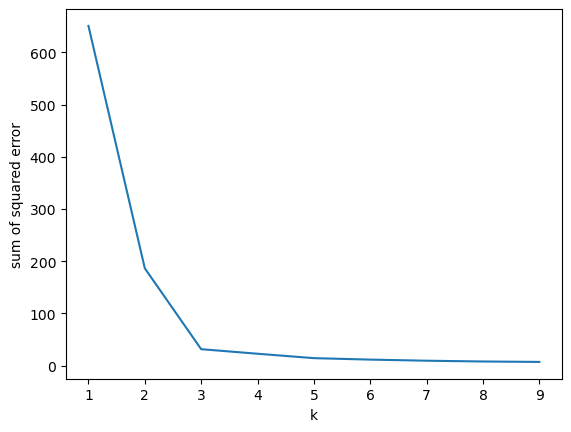

In [48]:
s=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df)
    s.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(range(1,10),s)

# OPTIMAL NO OF CLUSTERS=3